<a href="https://colab.research.google.com/github/ormorteey/BST-222-Survival-Analysis/blob/main/BST_222_Midterm_Project_%5BTime_Independent_Analysis%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
p_load(tidyverse, googledrive, KMsurv, survival, survminer, ggplot2)

In [ ]:
require(KMsurv)
require(survival)
data(burn)
burn1 <- burn
burn1 <- data.frame(burn1,Treatment=factor(burn1$Z1,
labels=c("Routine","Cleansing")))
burn1 <- data.frame(burn1,Gender=factor(burn1$Z2,
labels=c("Male","Female")))
burn1 <- data.frame(burn1,Race=factor(burn1$Z3,
labels=c("Nonwhite","White")))
burn1 <- data.frame(burn1,PercentBurned=burn1$Z4)
burn1 <- data.frame(burn1,SiteHead=factor(burn1$Z5,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteButtock=factor(burn1$Z6,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteTrunk=factor(burn1$Z7,
labels=c("NotBurned","Burned")))

Call:
survdiff(formula = burn1.surv ~ Treatment, data = burn1)

                     N Observed Expected (O-E)^2/E (O-E)^2/V
Treatment=Routine   70       28     21.4      2.07      3.79
Treatment=Cleansing 84       20     26.6      1.66      3.79

 Chisq= 3.8  on 1 degrees of freedom, p= 0.05 


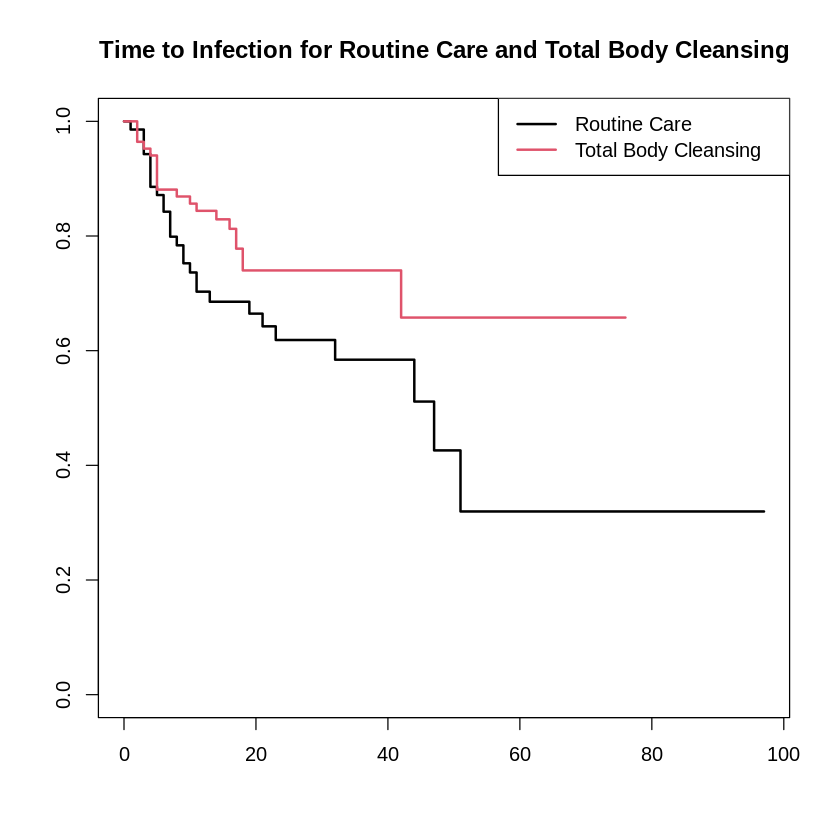

In [ ]:
burn1 <- data.frame(burn1,SiteUpperLeg=factor(burn1$Z8,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteLowerLeg=factor(burn1$Z9,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteRespTract=factor(burn1$Z10,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,BurnType=factor(burn1$Z11,
labels=c("Chemical","Scald","Electric","Flame")))

drop <- c("Z1",  "Z2",  "Z3",  "Z4",  "Z5",  "Z6",  "Z7",  "Z8",  "Z9",  "Z10", "Z11")
burn1_backup = burn1
burn1 <- burn1[,!names(burn1) %in% drop]

burn1.surv <- with(burn1,Surv(T3,D3))
KMcurves =  survfit(burn1.surv~Treatment,data=burn1, conf.int = 0.95)
plot(KMcurves,col=1:2,lwd=2)
title("Time to Infection for Routine Care and Total Body Cleansing")
legend("topright",c("Routine Care","Total Body Cleansing"),col=1:2,lwd=2)
print(survdiff(burn1.surv~Treatment,data=burn1))


In [ ]:
survdiff(formula = burn1.surv ~ Treatment, data = burn1)

Call:
survdiff(formula = burn1.surv ~ Treatment, data = burn1)

                     N Observed Expected (O-E)^2/E (O-E)^2/V
Treatment=Routine   70       28     21.4      2.07      3.79
Treatment=Cleansing 84       20     26.6      1.66      3.79

 Chisq= 3.8  on 1 degrees of freedom, p= 0.05 

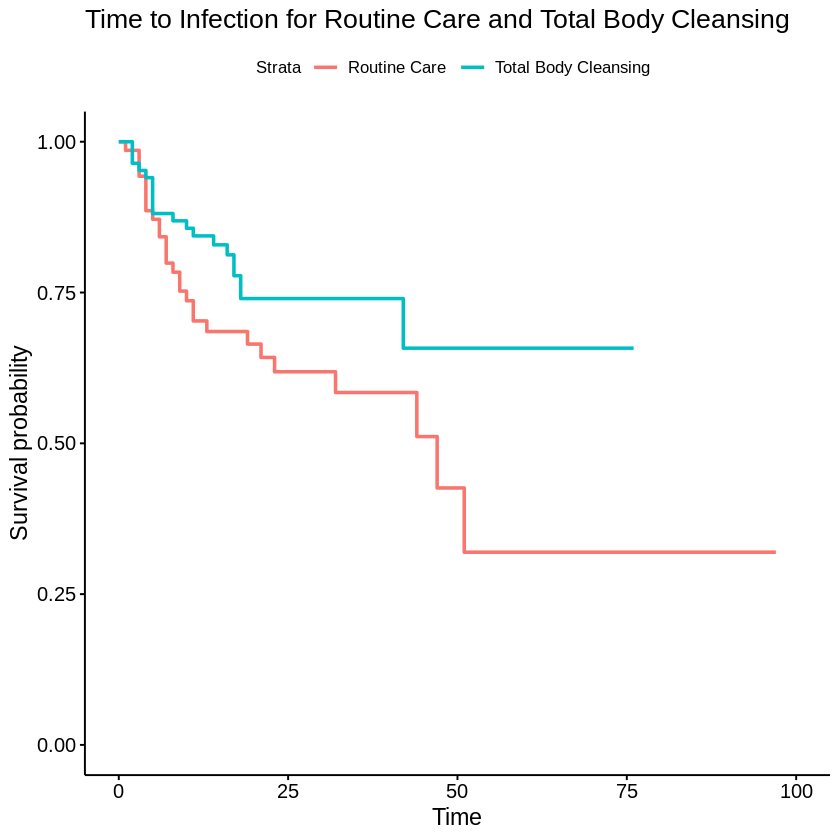

In [ ]:
ggsurvplot(KMcurves, legend.labs=c("Routine Care","Total Body Cleansing"), xlab = "Time",title = "Time to Infection for Routine Care and Total Body Cleansing", censor = F)

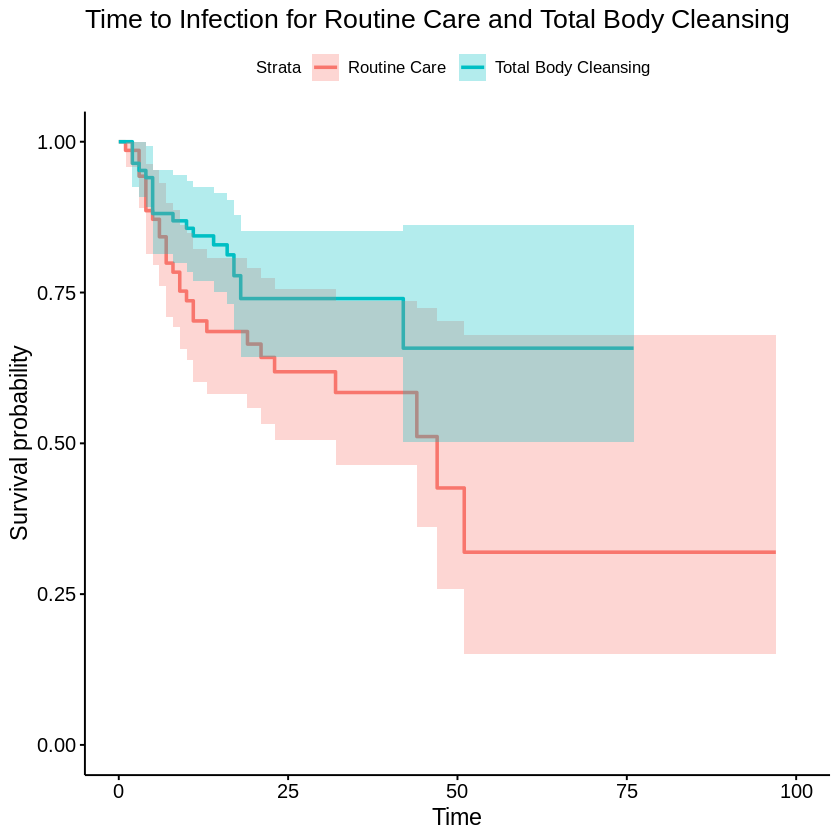

In [ ]:
ggsurvplot(KMcurves, conf.int = TRUE, legend.labs=c("Routine Care","Total Body Cleansing"), xlab = "Time",title = "Time to Infection for Routine Care and Total Body Cleansing", censor = F)

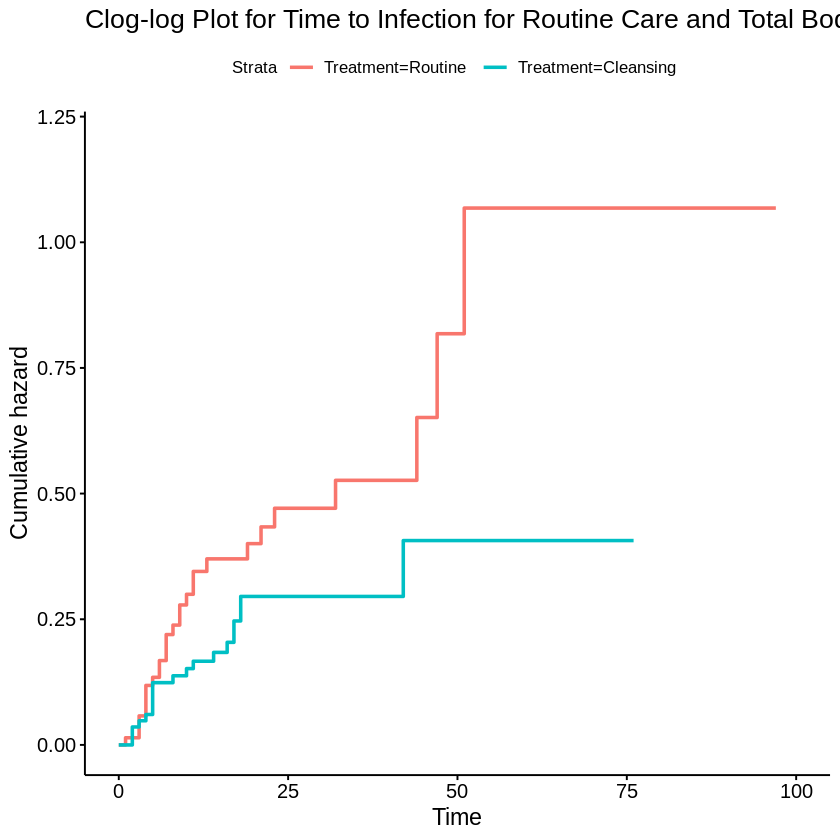

In [ ]:
na_curves <- survfit(burn1.surv ~ Treatment ,type = "fleming-harrington", data = burn1)

ggsurvplot(na_curves, fun = "cumhaz",  main = "Nelson-Aalen Cumulative Hazard", ylim = c(0,1.2), title = "Clog-log Plot for Time to Infection for Routine Care and Total Body Cleansing", censor = FALSE)

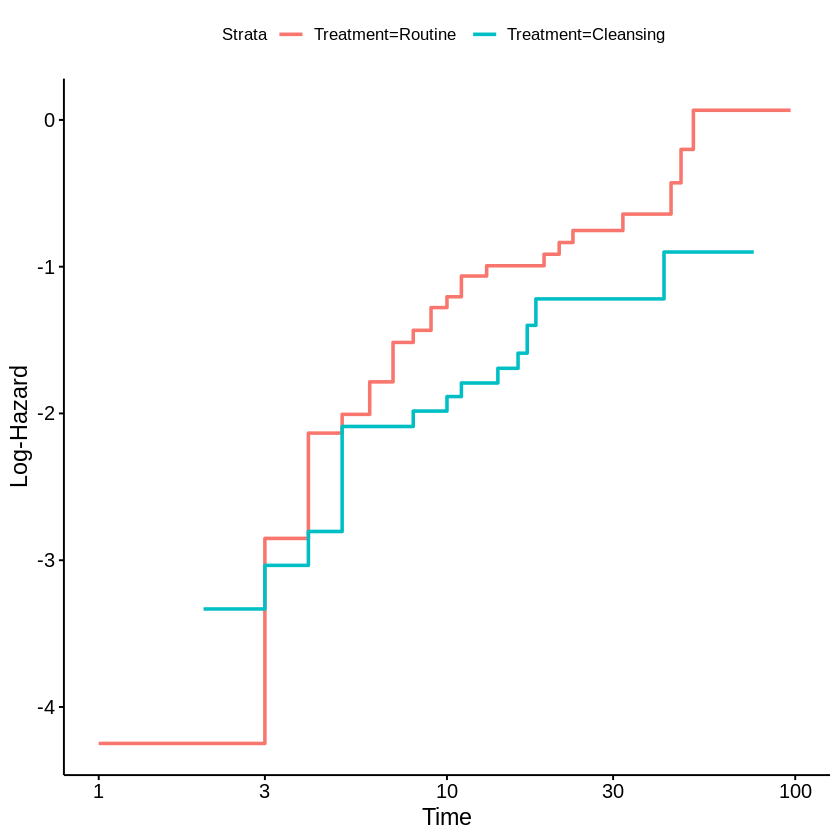

In [ ]:
ggsurvplot(na_curves, fun = "cloglog", main = "Complementary log−log", xlab = "Time", ylab = "Log-Hazard", censor = FALSE)

In [ ]:
cox_model_1 <- coxph(burn1.surv ~ Treatment + Race + PercentBurned + SiteHead + SiteButtock + SiteTrunk + SiteUpperLeg + SiteLowerLeg + SiteRespTract + BurnType, data = burn1)
print(summary(cox_model_1))

Call:
coxph(formula = burn1.surv ~ Treatment + Race + PercentBurned + 
    SiteHead + SiteButtock + SiteTrunk + SiteUpperLeg + SiteLowerLeg + 
    SiteRespTract + BurnType, data = burn1)

  n= 154, number of events= 48 

                         coef exp(coef)  se(coef)      z Pr(>|z|)  
TreatmentCleansing  -0.590595  0.553998  0.321526 -1.837   0.0662 .
RaceWhite            2.163638  8.702740  1.039142  2.082   0.0373 *
PercentBurned        0.003711  1.003718  0.009536  0.389   0.6971  
SiteHeadBurned       0.036269  1.036935  0.370224  0.098   0.9220  
SiteButtockBurned    0.546757  1.727641  0.430121  1.271   0.2037  
SiteTrunkBurned     -0.140112  0.869261  0.504298 -0.278   0.7811  
SiteUpperLegBurned  -0.153242  0.857922  0.394937 -0.388   0.6980  
SiteLowerLegBurned  -0.346130  0.707421  0.367909 -0.941   0.3468  
SiteRespTractBurned  0.148622  1.160234  0.365330  0.407   0.6841  
BurnTypeScald        1.551216  4.717204  1.123501  1.381   0.1674  
BurnTypeElectric     2.335947 1

In [ ]:
print(drop1(cox_model_1,test="Chisq"))

Single term deletions

Model:
burn1.surv ~ Treatment + Race + PercentBurned + SiteHead + SiteButtock + 
    SiteTrunk + SiteUpperLeg + SiteLowerLeg + SiteRespTract + 
    BurnType
              Df    AIC    LRT Pr(>Chi)   
<none>           437.37                   
Treatment      1 438.79 3.4189 0.064453 . 
Race           1 443.61 8.2363 0.004106 **
PercentBurned  1 435.52 0.1497 0.698824   
SiteHead       1 435.38 0.0096 0.921902   
SiteButtock    1 436.98 1.6040 0.205339   
SiteTrunk      1 435.45 0.0758 0.783059   
SiteUpperLeg   1 435.52 0.1521 0.696525   
SiteLowerLeg   1 436.29 0.9136 0.339162   
SiteRespTract  1 435.54 0.1649 0.684710   
BurnType       3 439.72 8.3450 0.039394 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
cox_model_2 <- coxph(burn1.surv ~ Treatment + Race + BurnType, data = burn1)
print(summary(cox_model_2))

Call:
coxph(formula = burn1.surv ~ Treatment + Race + BurnType, data = burn1)

  n= 154, number of events= 48 

                      coef exp(coef) se(coef)      z Pr(>|z|)  
TreatmentCleansing -0.6009    0.5483   0.2979 -2.018   0.0436 *
RaceWhite           2.2842    9.8182   1.0260  2.226   0.0260 *
BurnTypeScald       1.5785    4.8477   1.0865  1.453   0.1463  
BurnTypeElectric    2.1719    8.7745   1.0856  2.001   0.0454 *
BurnTypeFlame       1.0035    2.7278   1.0163  0.987   0.3234  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
TreatmentCleansing    0.5483     1.8238    0.3058     0.983
RaceWhite             9.8182     0.1019    1.3144    73.340
BurnTypeScald         4.8477     0.2063    0.5764    40.775
BurnTypeElectric      8.7745     0.1140    1.0450    73.676
BurnTypeFlame         2.7278     0.3666    0.3722    19.992

Concordance= 0.705  (se = 0.037 )
Likelihood ratio test= 21.85  on 5 df,   

In [ ]:
#fit residuals
burn1.mart <- residuals(cox_model_2, type="martingale")
burn1.dev <- residuals(cox_model_2, type="deviance")
burn1.dfb <- residuals(cox_model_2, type="dfbeta")
#find linear predictor
burn1.preds <- predict(cox_model_2)

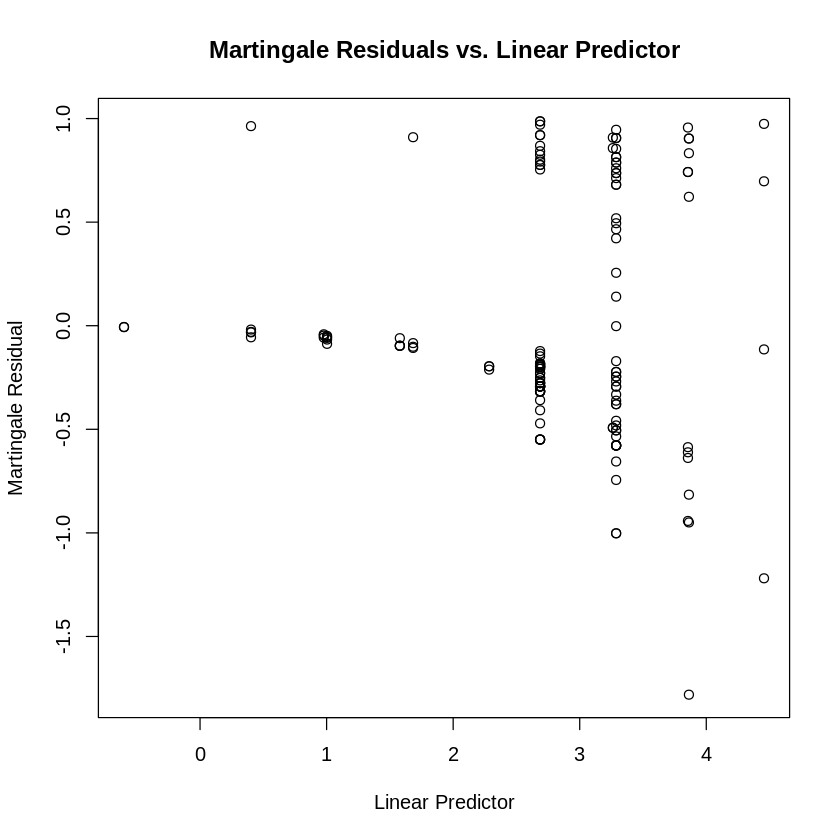

In [ ]:
plot(burn1.preds,burn1.mart,xlab="Linear Predictor",ylab="Martingale Residual")
title("Martingale Residuals vs. Linear Predictor")

In [ ]:
mart_1_df = data.frame(id = 1:length(burn1.mart), mart = burn1.mart)
mart_1_df <- mart_1_df[order(mart_1_df$mart),]

head(mart_1_df,3)
tail(mart_1_df,3)

,id,mart
,<int>,<dbl>
67,67,-1.780965
32,32,-1.219261
22,22,-1.002140


,id,mart
,<int>,<dbl>
58,58,0.9741952
79,79,0.9865236
153,153,0.9865236


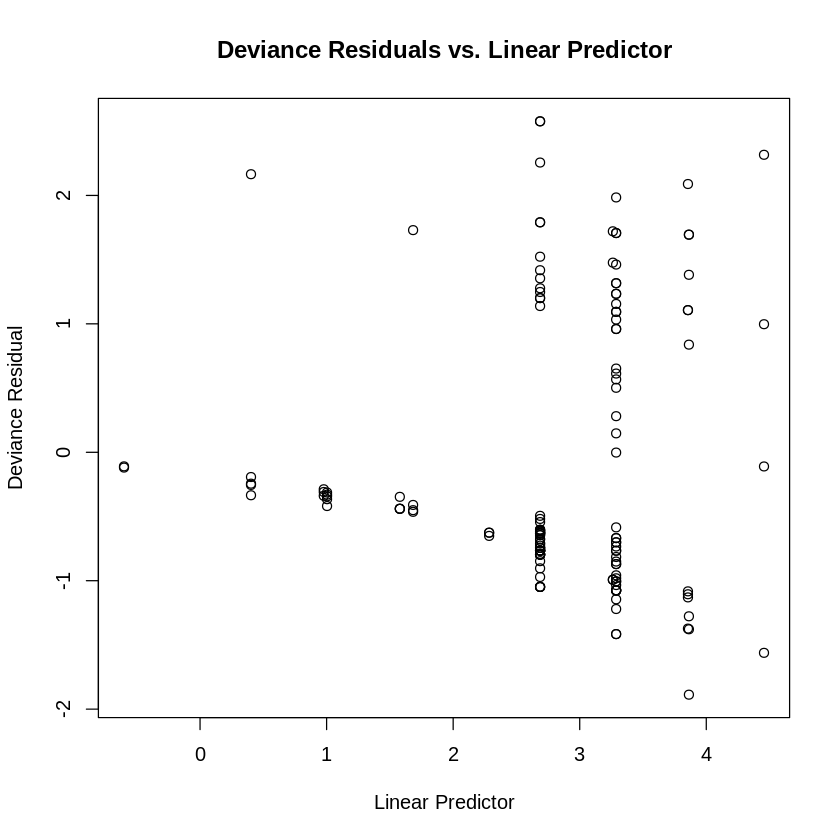

In [ ]:
plot(burn1.preds,burn1.dev,xlab="Linear Predictor",ylab="Deviance Residual")
title("Deviance Residuals vs. Linear Predictor")

In [ ]:
pred_df = data.frame(id = 1:length(burn1.preds), pred = burn1.preds)
pred_df <- pred_df[order(pred_df$pred),]
head(pred_df,3)
tail(pred_df,3)

,id,pred
,<int>,<dbl>
102,102,-0.6009345
107,107,-0.6009345
113,113,0.4025623


,id,pred
,<int>,<dbl>
34,34,4.456091
58,58,4.456091
62,62,4.456091


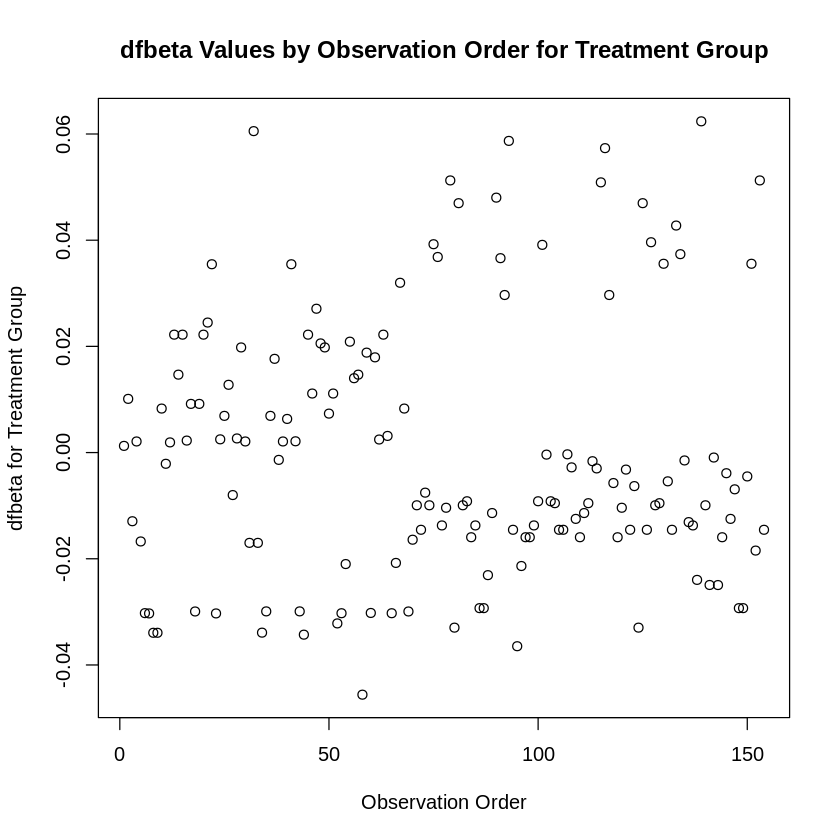

In [ ]:
plot(burn1.dfb[,1],xlab="Observation Order",ylab="dfbeta for Treatment Group")
title("dfbeta Values by Observation Order for Treatment Group")

In [ ]:
dfb1_df = data.frame(id = 1:length(burn1.dfb[,1]), dfb1 = burn1.dfb[,1])
dfb1_df <- dfb1_df[order(dfb1_df$dfb1),]

head(dfb1_df,4)
tail(dfb1_df,3)


,id,dfb1
,<int>,<dbl>
58,58,-0.04559361
95,95,-0.03646913
44,44,-0.03429231
8,8,-0.03393669


,id,dfb1
,<int>,<dbl>
93,93,0.05870312
32,32,0.06054224
139,139,0.06238662


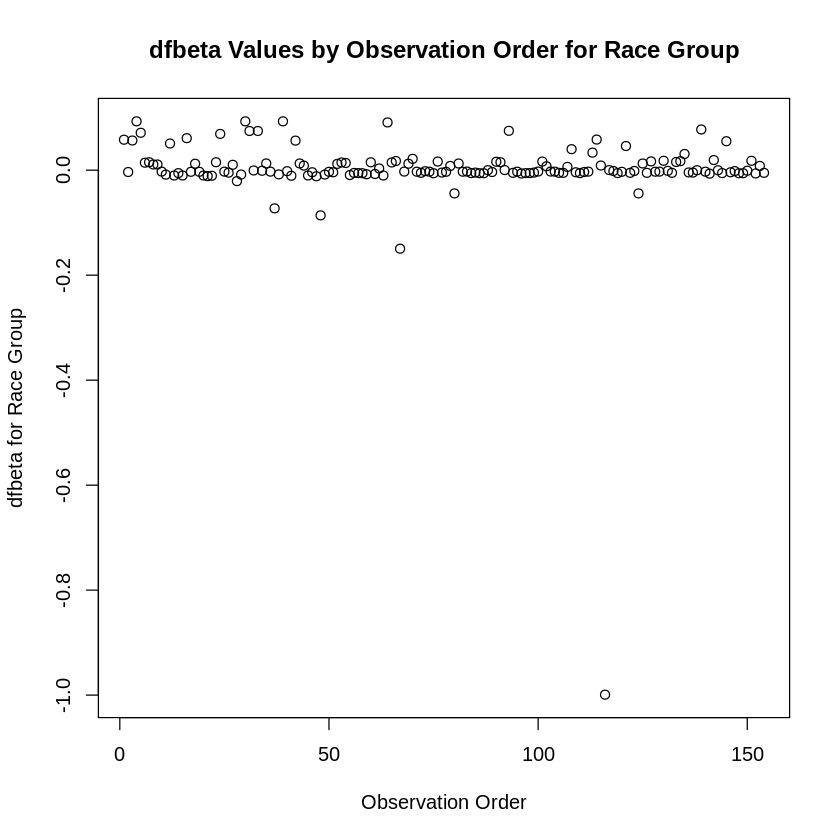

In [ ]:
plot(burn1.dfb[,2],xlab="Observation Order",ylab="dfbeta for Race Group")
title("dfbeta Values by Observation Order for Race Group")

In [ ]:
dfb2_df = data.frame(id = 1:length(burn1.dfb[,2]), dfb2 = burn1.dfb[,2])
dfb2_df <- dfb2_df[order(dfb2_df$dfb2),]

head(dfb2_df,4)
tail(dfb2_df,3)


,id,dfb2
,<int>,<dbl>
116,116,-0.99913320
67,67,-0.14959023
48,48,-0.08609599
37,37,-0.07271330


,id,dfb2
,<int>,<dbl>
4,4,0.09304343
30,30,0.09304343
39,39,0.09304343


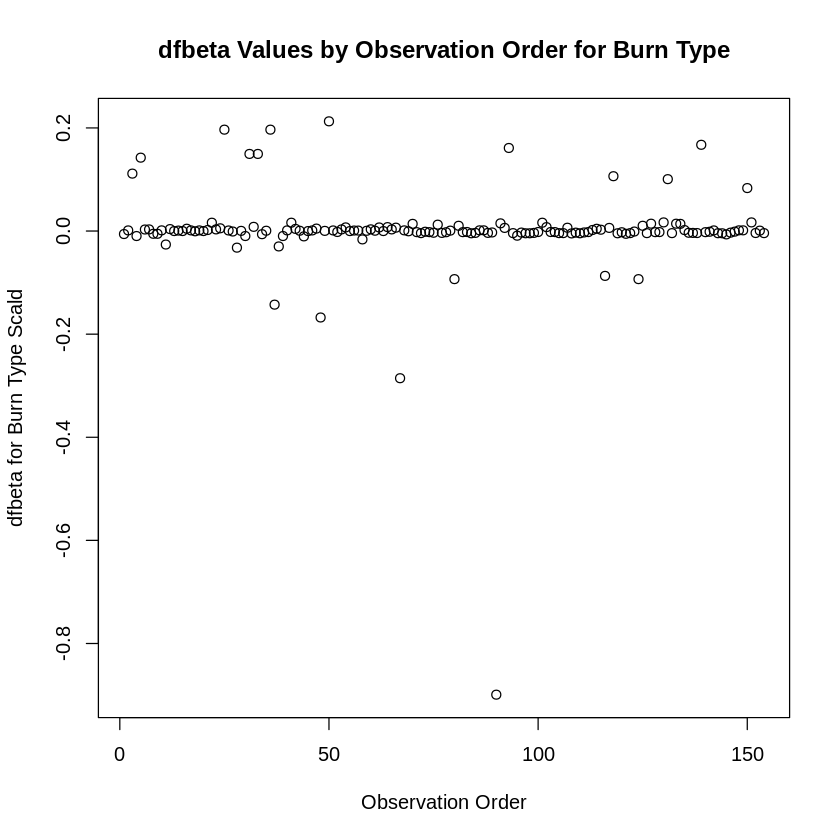

In [ ]:
plot(burn1.dfb[,3],xlab="Observation Order",ylab="dfbeta for Burn Type Scald")
title("dfbeta Values by Observation Order for Burn Type")

In [ ]:
dfb3_df = data.frame(id = 1:length(burn1.dfb[,3]), dfb3 = burn1.dfb[,3])
dfb3_df <- dfb3_df[order(dfb3_df$dfb3),]

head(dfb3_df,4)
tail(dfb3_df,3)


,id,dfb3
,<int>,<dbl>
90,90,-0.8992846
67,67,-0.2854758
48,48,-0.1676796
37,37,-0.1427579


,id,dfb3
,<int>,<dbl>
25,25,0.1966710
36,36,0.1966710
50,50,0.2127989


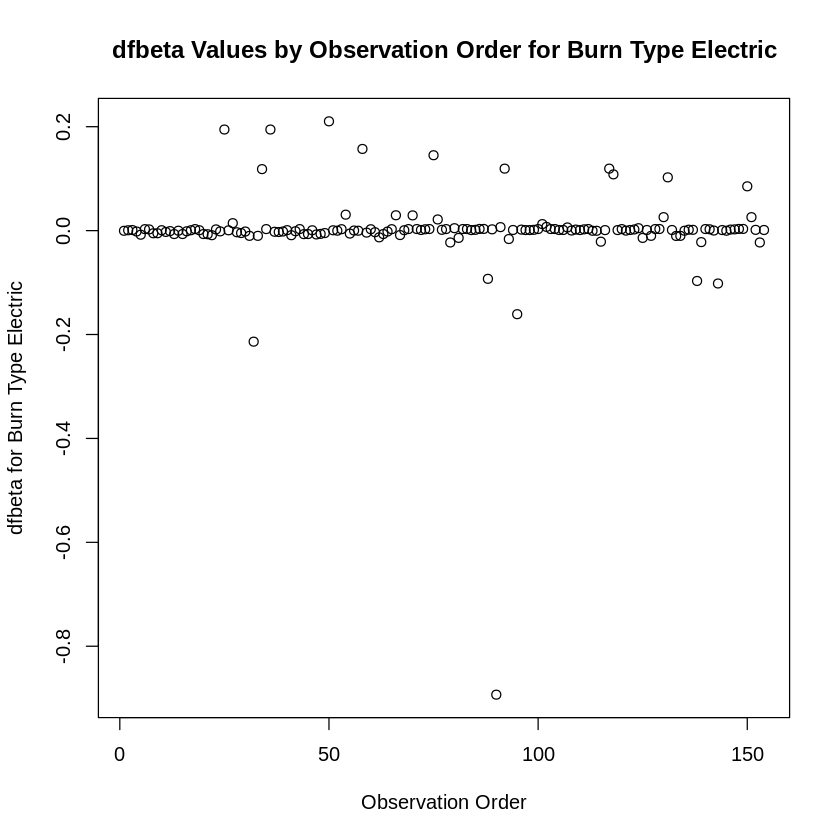

In [ ]:
plot(burn1.dfb[,4],xlab="Observation Order",ylab="dfbeta for Burn Type Electric")
title("dfbeta Values by Observation Order for Burn Type Electric")

In [ ]:
dfb4_df = data.frame(id = 1:length(burn1.dfb[,4]), dfb4 = burn1.dfb[,4])
dfb4_df <- dfb4_df[order(dfb4_df$dfb4),]

head(dfb4_df,4)
tail(dfb4_df,3)


,id,dfb4
,<int>,<dbl>
90,90,-0.8932206
32,32,-0.2137398
95,95,-0.1608761
143,143,-0.1017966


,id,dfb4
,<int>,<dbl>
25,25,0.1945633
36,36,0.1945633
50,50,0.2103375


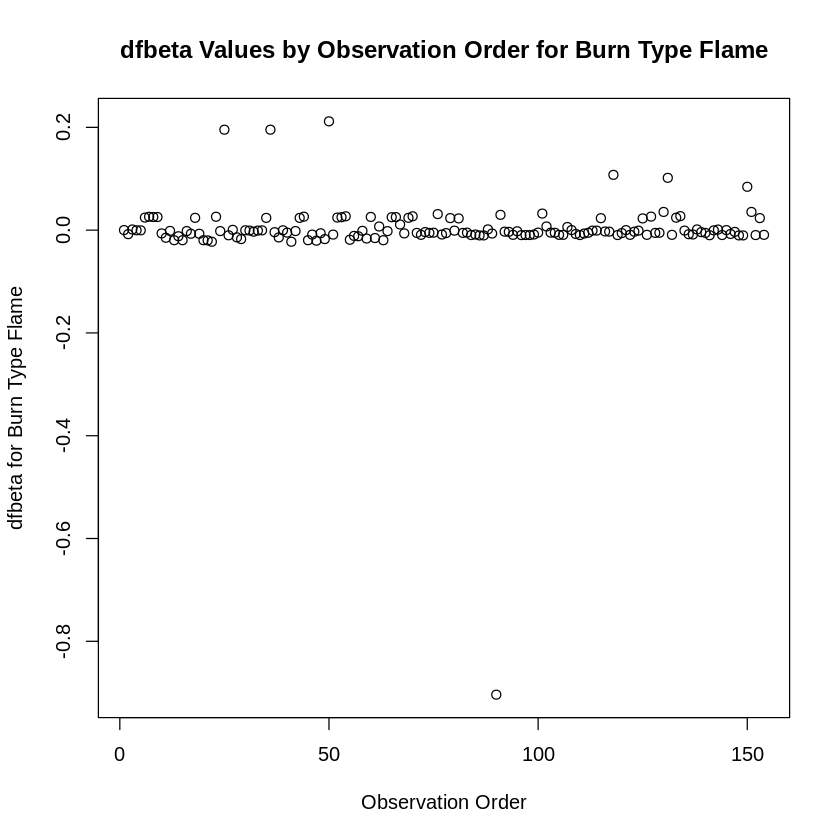

In [ ]:
plot(burn1.dfb[,5],xlab="Observation Order",ylab="dfbeta for Burn Type Flame")
title("dfbeta Values by Observation Order for Burn Type Flame")

In [ ]:
dfb5_df = data.frame(id = 1:length(burn1.dfb[,5]), dfb5 = burn1.dfb[,5])
dfb5_df <- dfb5_df[order(dfb5_df$dfb5),]

head(dfb5_df,5)
tail(dfb5_df,3)


,id,dfb5
,<int>,<dbl>
90,90,-0.90380643
22,22,-0.02254110
41,41,-0.02254110
47,47,-0.02050972
21,21,-0.02000108


,id,dfb5
,<int>,<dbl>
25,25,0.1954522
36,36,0.1954522
50,50,0.2117013


## **Time Dependent Analysis**

In [ ]:
burn2 <- tmerge(burn1, burn1, Obs, tstop=T3)

#set time to excision
burn2 <- tmerge(burn2, burn1, Obs, excis = tdc(T1))

#set time to anti biotics
burn2 <- tmerge(burn2, burn1, Obs, antib = tdc(T2))

#status at the end, either they had an infection or they were censored
status <- as.integer(with(burn2, (tstop == T3 & D3)))

#put together
burn2 <- data.frame(burn2,status)

In [ ]:
burn2[which(burn2$Obs == 1),]

,Obs,T1,D1,T2,D2,T3,D3,Treatment,Gender,Race,⋯,SiteTrunk,SiteUpperLeg,SiteLowerLeg,SiteRespTract,BurnType,tstart,tstop,excis,antib,status
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>
1,1,12,0,12,0,12,0,Routine,Male,Nonwhite,⋯,Burned,Burned,NotBurned,NotBurned,Scald,0,12,0,0,0


In [ ]:
burn2[which(burn2$Obs == 4),]

,Obs,T1,D1,T2,D2,T3,D3,Treatment,Gender,Race,⋯,SiteTrunk,SiteUpperLeg,SiteLowerLeg,SiteRespTract,BurnType,tstart,tstop,excis,antib,status
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>
4,4,11,1,29,0,29,0,Routine,Male,Nonwhite,⋯,Burned,NotBurned,NotBurned,NotBurned,Scald,0,11,0,0,0
5,4,11,1,29,0,29,0,Routine,Male,Nonwhite,⋯,Burned,NotBurned,NotBurned,NotBurned,Scald,11,29,1,0,0


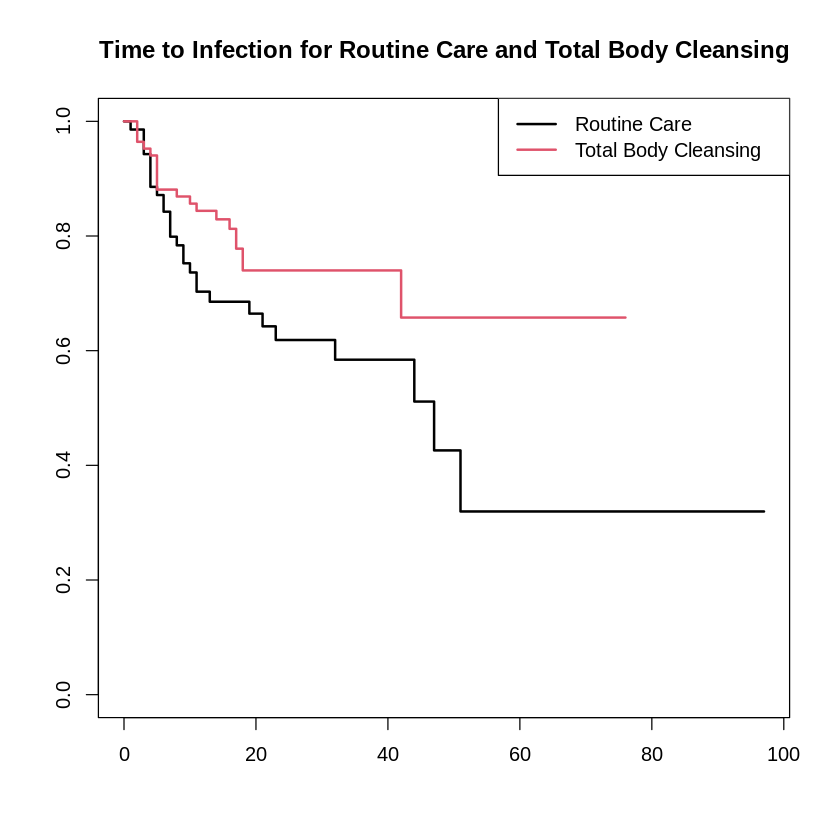

In [ ]:
burn2.surv <- Surv(time=burn2$tstart,time2=burn2$tstop,event=burn2$status, type="counting")

KMcurves =  survfit(burn2.surv ~ Treatment, data=burn2, conf.int = 0.95)
plot(KMcurves,col=1:2,lwd=2)
title("Time to Infection for Routine Care and Total Body Cleansing")
legend("topright",c("Routine Care","Total Body Cleansing"),col=1:2,lwd=2)


In [ ]:
rmarkdown:::convert_ipynb("BST_222_Midterm_Project_[Time_Independent_Analysis].ipynb")